In [1]:
import numpy as np
import pandas as pd

In [17]:
data = pd.read_csv("C:\\Users\\91993\\Downloads\\student_purchase_behaviour.csv")
data

,0,age,income,student,credit_rating,buys_computer
0,1,<=30,high,no,fair,no
1,2,<=30,high,no,excellent,no
2,3,31...40,high,no,fair,yes
3,4,>40,medium,no,fair,yes
4,5,>40,low,yes,fair,yes
5,6,>40,low,yes,excellent,no
6,7,31...40,low,yes,excellent,yes
7,8,<=30,medium,no,fair,no
8,9,<=30,low,yes,fair,yes
9,10,>40,medium,yes,fair,yes


In [20]:
import math

 
# Calculate the entropy of a given target attribute
def entropy(target_attr):
    counts = {}
    total = len(target_attr)

    for entry in target_attr:
        if entry not in counts:
            counts[entry] = 0
        counts[entry] += 1

    entropy = 0
    for key in counts:
        probability = counts[key] / total
        entropy -= probability * math.log2(probability)

    return entropy

# Calculate the information gain for a given dataset and attribute
def information_gain(data, attribute_index):
    total_entropy = entropy([row[-1] for row in data])
    attribute_values = {}

    for row in data:
        value = row[attribute_index]
        if value not in attribute_values:
            attribute_values[value] = []
        attribute_values[value].append(row)

    for value in attribute_values:
        subset = attribute_values[value]
        subset_entropy = entropy([row[-1] for row in subset])
        total_entropy -= (len(subset) / len(data)) * subset_entropy

    return total_entropy

# Define attribute names
attributes = ["age", "income", "student", "credit_rating"]

# Calculate information gain for each attribute
ig_values = {}
for i in range(len(attributes)):
    ig = information_gain(data, i)
    ig_values[attributes[i]] = ig

# Find the attribute with the highest information gain
root_node = max(ig_values, key=ig_values.get)

print("Information Gain for each attribute:")
for attribute, ig in ig_values.items():
    print(f"{attribute}: {ig}")

print(f"The root node for the decision tree is: {root_node}")


Information Gain for each attribute:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.048127030408269544
The root node for the decision tree is: age


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

X = [row[:-1] for row in data]
y = [row[-1] for row in data]


label_encoders = [LabelEncoder() for _ in range(len(X[0]))]

for i in range(len(label_encoders)):
    X_column = [row[i] for row in X]
    X_column_encoded = label_encoders[i].fit_transform(X_column)
    for j in range(len(X)):
        X[j][i] = X_column_encoded[j]

model = DecisionTreeClassifier()
model.fit(X, y)
tree_depth = model.get_depth()
print("Depth of the constructed tree:", tree_depth)

Depth of the constructed tree: 4


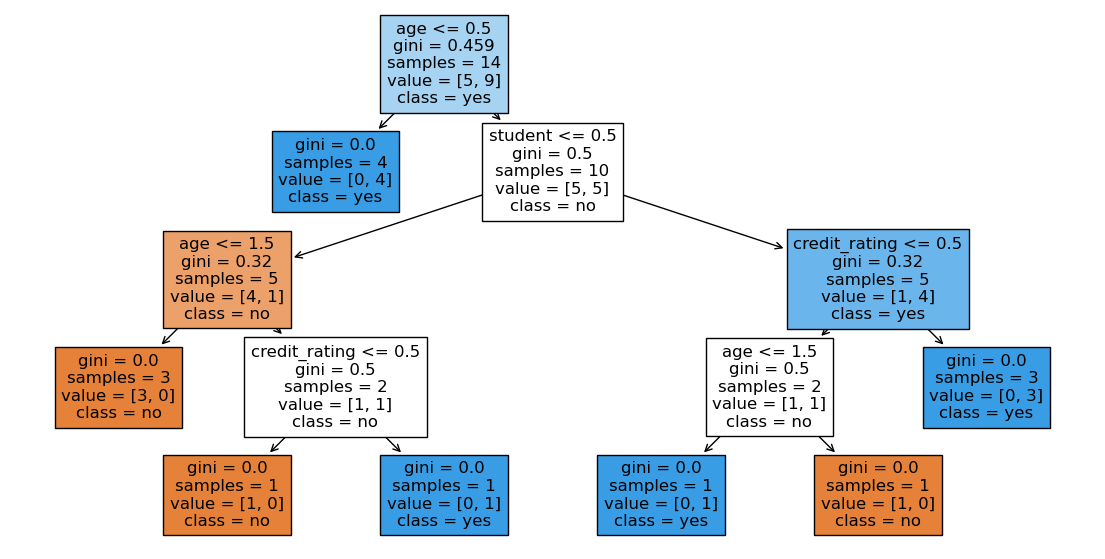

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

model = DecisionTreeClassifier()

model.fit(X, y)
plt.figure(figsize=(14, 7))
plot_tree(model, filled=True, feature_names=["age", "income", "student", "credit_rating"], class_names=["no", "yes"])
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

combined_X = Tr_X + Te_X

label_encoders = [LabelEncoder() for _ in range(len(Tr_X[0]))]

for i in range(len(label_encoders)):
    combined_X_column = [row[i] for row in combined_X]
    combined_X_column_encoded = label_encoders[i].fit_transform(combined_X_column)
    
    for j in range(len(combined_X)):
        combined_X[j][i] = combined_X_column_encoded[j]

Tr_X_encoded = combined_X[:len(Tr_X)]
Te_X_encoded = combined_X[len(Tr_X):]

model = DecisionTreeClassifier()
model.fit(Tr_X_encoded, Tr_y)
training_accuracy = model.score(Tr_X_encoded, Tr_y)
test_accuracy = model.score(Te_X_encoded, Te_y)

print("Training Set Accuracy:", training_accuracy)
print("Test Set Accuracy:", test_accuracy)

NameError: name 'Tr_X' is not defined